In [2]:
from sspredict.make_prediction.read_input import read_inputjson_edge_single_calculation
from sspredict.make_prediction.make_composition import build_mesh_ternary
from sspredict.make_prediction.models import ss_edge_model_T, ss_edge_model_T_w_uncertainty
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [3]:
BCC_file = '../examples/BCC_edge/MoNbTaVW/sample_input_MoNbTaVW_BCC_edge.json'

In [4]:
input_data = read_inputjson_edge_single_calculation(BCC_file)
input_data.check_integrity_curtin_edge()
input_data.grab_properties_curtin_edge()

In [5]:
# calculate without uncertainty
model = ss_edge_model_T(input_data.dislocation_properties,input_data.exp_conditions,
                            input_data.element_composition,input_data.element_data,input_data.structure)
model.calculate()
model.writedata()

In [6]:
T = (model.calc_data['T'])

sigma_ss_1 = model.calc_data['Delta_sigma_ss']

No handles with labels found to put in legend.


Text(0, 0.5, 'Delta_sigma_ss (MPa)')

<Figure size 432x288 with 0 Axes>

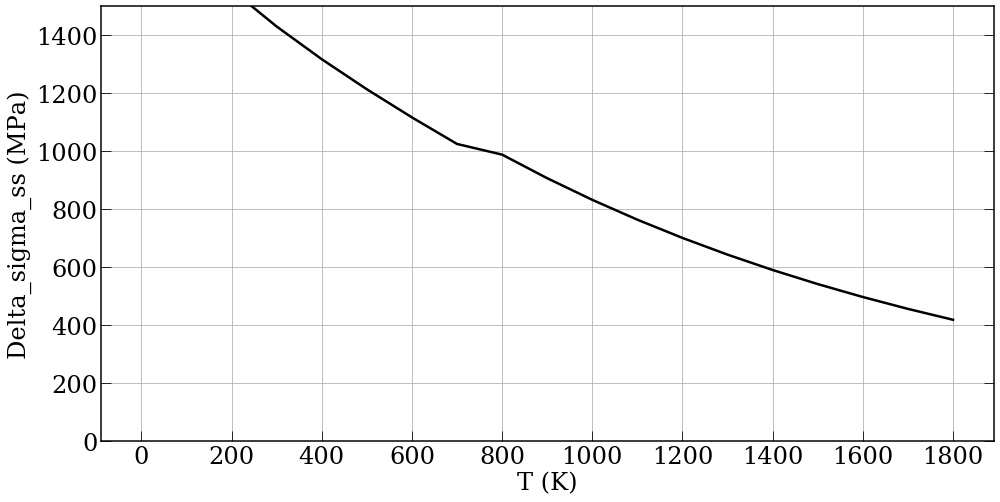

In [7]:
plt.draw()
f = plt.figure(figsize=(16,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,1500)
ax1.grid()
colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256
ax1.plot(T,sigma_ss_1,color='k',mec='k',mfc='None',ms=12,ls='-',lw=2.5,label='')

ax1.set_xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('Delta_sigma_ss (MPa)',fontproperties=ticks_font)

In [8]:
# calculate with uncertainty
model_mc = ss_edge_model_T_w_uncertainty(ss_edge_model_T,input_data.dislocation_properties,
                            input_data.exp_conditions,input_data.element_composition,
                            input_data.element_data,input_data.uncertainty_levels,input_data.structure)
model_mc.calculate()
model_mc.writedata()

In [9]:
T = (model.calc_data['T'])
sigma_ss = model_mc.calc_data['Delta_sigma_ss']
std_sigma_ss = model_mc.calc_data['std_Delta_sigma_ss']


In [10]:
paper_data = pd.read_csv('./MoNbTaVW_paper_extracted.csv',sep='\s+')

Text(0, 0.5, 'Tensile Yield Stress (MPa)')

<Figure size 432x288 with 0 Axes>

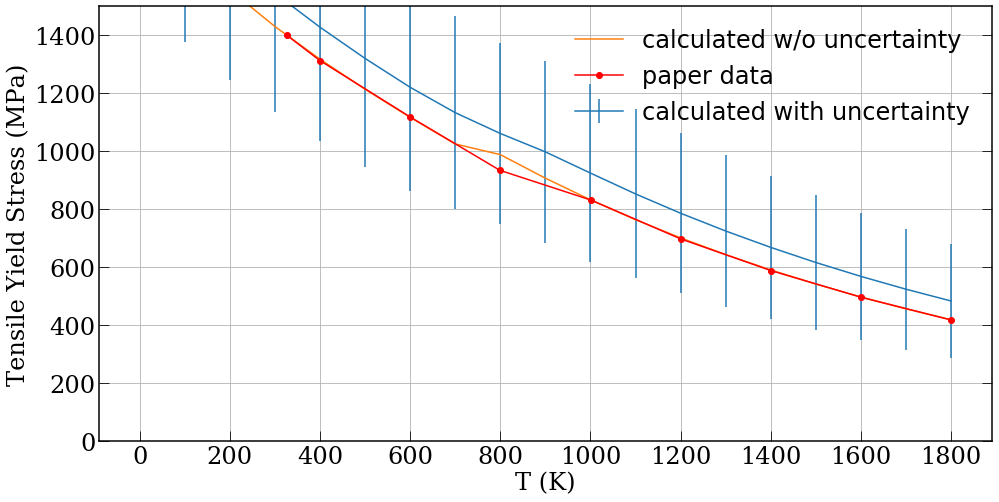

In [11]:
plt.draw()
f = plt.figure(figsize=(16,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

#ax1.set_xlim(0.0,1501)
ax1.set_ylim(0,1500)
ax1.grid()
colors=np.array([[0,0,0],[30,136,229],[225,193,7],[212,27,93]])/256
ax1.errorbar(T,sigma_ss,std_sigma_ss,label='calculated with uncertainty')
ax1.plot(T,sigma_ss_1,label='calculated w/o uncertainty')
ax1.plot(paper_data['x'],paper_data['y'],'ro-',label='paper data')

ax1.set_xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('T (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel('Tensile Yield Stress (MPa)',fontproperties=ticks_font)

In [24]:
print(model_mc.aver_b[0],model.aver_b[0])
print(model_mc.aver_b[0]*2/np.sqrt(3),model.aver_b[0]*2/np.sqrt(3))
print((model_mc.aver_b[0]*2/np.sqrt(3))**3/2,(model.aver_b[0]*2/np.sqrt(3))**3/2)
print(model_mc.aver_V[0],model.aver_V[0])
print(model_mc.calc_data['V_ave'][0],model.calc_data['V_ave'][0])
print(model_mc.calc_data['std_V_ave'][0],model_mc.calc_data['std_b_ave'][0])
print(model_mc.aver_E[0],model.aver_E[0])
print(model_mc.aver_G[0],model.aver_G[0])
print(model_mc.aver_Nu[0],model.aver_Nu[0])
print(model_mc.aver_sum_cndVn_b6[0],model.sum_cndVn_b6[0])






print(input_data.element_data)
print(model.elements_data)
3.198766741**3/2,81.976/5
#(15.443+17.645+17.97+14.852+16.066)/5,(1.5443+1.7645+1.797+1.4852+1.6066)/5

2.770214754794207e-10 2.770213258402848e-10
3.198768468787017e-10 3.198766740903109e-10
1.6365090959646485e-29 1.636506443978831e-29
1.640001656930765e-29 1.6395200000000002e-29
16.4 16.395200000000003
0.22576320653477097 0.0127
263700108866.37775 263700000000.0
91877600454.09007 92000000000.0
0.4333636681273472 0.43300000000000005
0.003704411483998893 0.0032918287933368165
{'Mo': {'Vn': 15.443, 'G': 92, 'nu': 0.433, 'E': 263.7, 'a': 3.137525197810361, 'b': 2.7171765263175685}, 'Nb': {'Vn': 17.645, 'G': 92, 'nu': 0.433, 'E': 263.7, 'a': 3.280075845955839, 'b': 2.8406290089374893}, 'Ta': {'Vn': 17.97, 'G': 92, 'nu': 0.433, 'E': 263.7, 'a': 3.300091824809441, 'b': 2.8579633551063206}, 'V': {'Vn': 14.852, 'G': 92, 'nu': 0.433, 'E': 263.7, 'a': 3.096979367753126, 'b': 2.682062807470476}, 'W': {'Vn': 16.066, 'G': 92, 'nu': 0.433, 'E': 263.7, 'a': 3.179161468186779, 'b': 2.7532345941823837}}
{'Mo': {'Vn': 1.5443e-29, 'G': 92000000000, 'nu': 0.433, 'E': 263700000000.0, 'a': 3.137525197810361e

(16.365064441275404, 16.3952)

In [23]:
# NOTE
# The data reported in the paper came from the full theory prediction,
# using the full theory for the alloy
# the yield stress is about 630MPA
# the energy barrier is about 2.8-2.9 eV

# for this reduced theory 
print('The yield stress is {}, the energy barrier is {}'.format(model.Ty0[0]/1e6, model.calc_data['Delta_Eb'][0]))
# expect 10% difference between the full and reduced theory.
# this result is actually very good.

# also note at about 800 K,
# the calculation without uncertainty differs from the paper value,
# this is due to the transition from multi bow out to single bow out 
# by running monte carlo with uncertainty, this transition is "smoother", see blue line. 
# the differences between the mc and single calculation are 
# due to the uncertainty enforced on lattice constants and elastic constants for all the elements.
# in the mc runs, 1000 samples were collected, 
# by increasing the number of samples, this will eventually converge to the value. 
# but that takes up too much time, so it is not supported as an input parameter

The yield stress is 641.98210592747, the energy barrier is 2.943
